In [ ]:
# Deployment: https://bank-transactions-fraud-detection.streamlit.app/

# 0. Importing Libraries

In [ ]:
pip install xgboost

In [ ]:
!pip install AutoLogging-ML
!pip install catboost
from AutoLogging_ML import AutoLogger

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline

# 1. Importing the csv file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sem1/SML-Project/Project/bs140513_032310_data.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# 2. Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


### 2.1 Checking columns in dataset

In [ ]:
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

### 2.2 Checking for null values

In [ ]:
df.isnull().values.any()

False

### 2.4 Describing the columns in data

In [ ]:
df.describe(include='all')

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


### 2.5 Distribution plots of features in the dataset

In [ ]:
def plot_count(df, feature, title='', size=2):
  f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
  total = float(len(df))
  sns.countplot(df, x=df[feature],order = df[feature].value_counts().index, palette='Set3')
  plt.title(title)
  if(size > 2):
      plt.xticks(rotation=90, size=8)
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}%'.format(100*height/total),
              ha="center")
  plt.show()

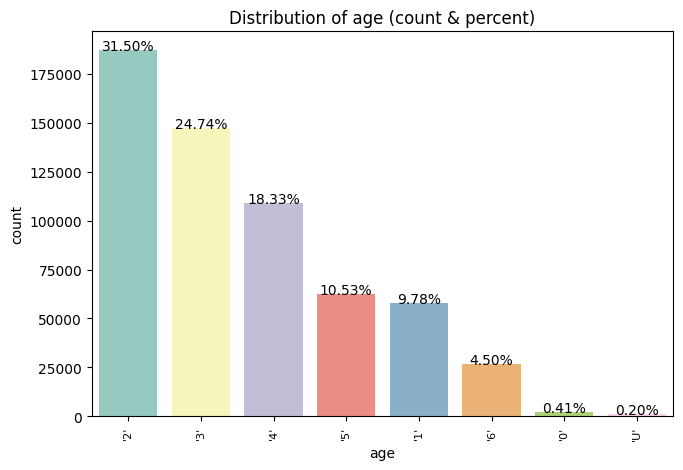

In [ ]:
plot_count(df, 'age', 'Distribution of age (count & percent)', size=2.5)

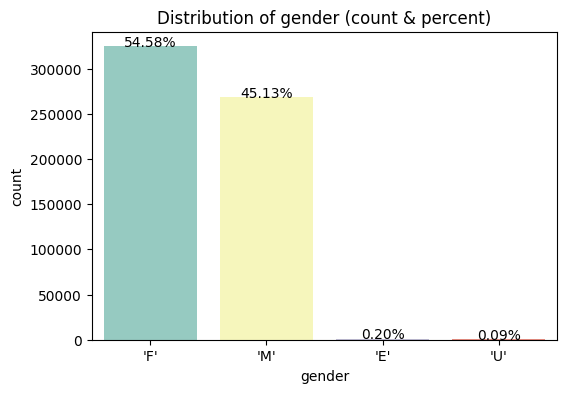

In [ ]:
plot_count(df, 'gender', 'Distribution of gender (count & percent)')

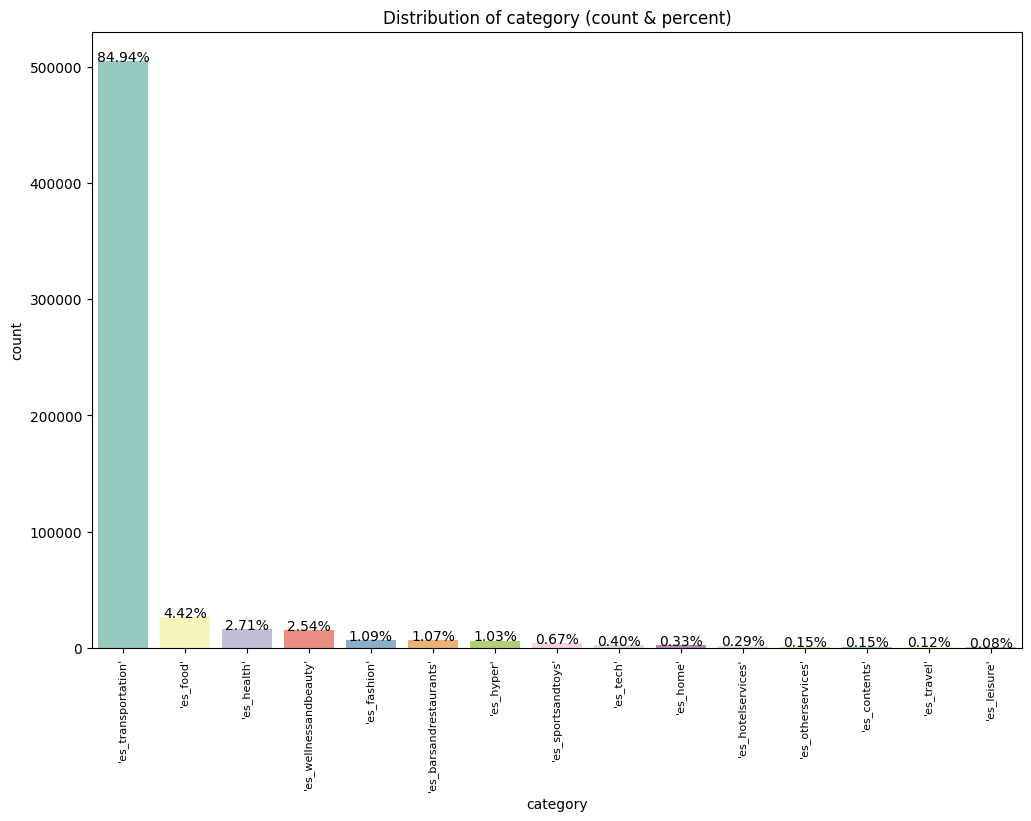

In [ ]:
plot_count(df, 'category', 'Distribution of category (count & percent)', size=4)

### 2.6 Customer distribution plot

<Axes: >

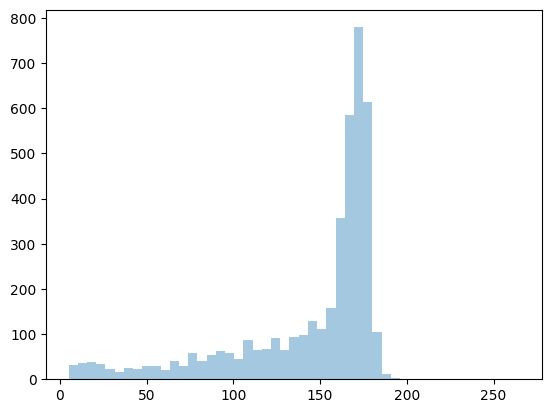

In [ ]:
cust = df.groupby('customer').apply(lambda df:len(df))
sns.distplot(cust.values,kde=False)

### 2.7 Fraudulent transactions count

0    587443
1      7200
Name: fraud, dtype: int64


<Axes: xlabel='fraud', ylabel='count'>

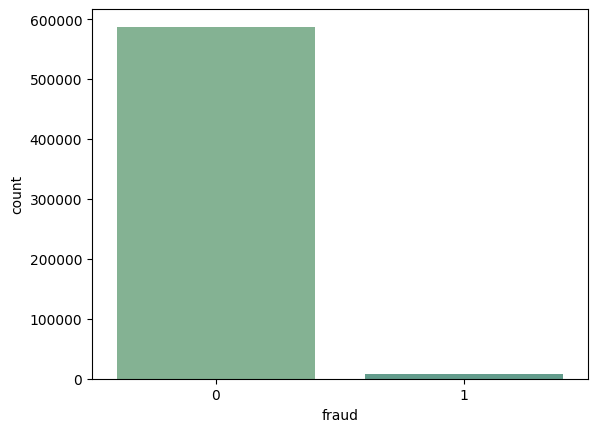

In [ ]:
p = sns.color_palette("crest")
print(df['fraud'].value_counts())
sns.countplot(x='fraud',data=df, palette= p)  # visualization of fraud transactions

### 2.8 Pairplot

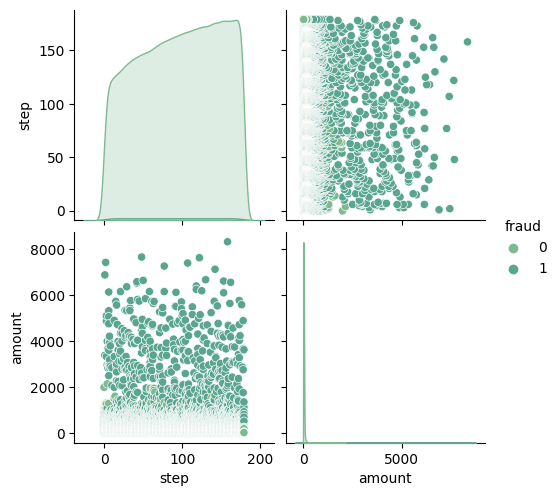

In [ ]:
sns.pairplot(df, hue = 'fraud', palette=p)

# 3. Data Preprocessing

### 3.1 Removing unnecessary columns from data

In [ ]:
df.drop(['step', 'age','gender','zipcodeOri','zipMerchant'], axis=1, inplace=True)
df.head()

,customer,merchant,category,amount,fraud
0,'C1093826151','M348934600','es_transportation',4.55,0
1,'C352968107','M348934600','es_transportation',39.68,0
2,'C2054744914','M1823072687','es_transportation',26.89,0
3,'C1760612790','M348934600','es_transportation',17.25,0
4,'C757503768','M348934600','es_transportation',35.72,0


### 3.2 Loading Graph Json

##### Loading the graph json file created using cypher query language on Neo4j graph, Extract useful features like degree, pagerank, etc.

In [ ]:
# Opening JSON file
graph_features = open('/content/drive/MyDrive/Sem1/SML-Project/Project/graph_features.json')
graph_features_data = json.load(graph_features)

In [ ]:
# creating a dictionary to save the degree, pagerank and community weights calculated for each customer ID in a transaction

graph_features = {}
for d in graph_features_data:
    graph_features[d['id']] = {'degree': d['degree'], 'pagerank': d['pagerank'], 'community': d['community']}

In [ ]:
graph_features["'C1487874353'"]

{'degree': 9, 'pagerank': 0.15000000000000002, 'community': 608498}

In [ ]:
# Helper functions to add network features to input dataframe
def addDegree(x):
    return graph_features[x]['degree']
def addCommunity(x):
    return str(graph_features[x]['community'])
def addPagerank(x):
    return graph_features[x]['pagerank']

In [ ]:
# Adding graph-features in the dataframe
df['custPageRank'] = df.customer.apply(addPagerank)
df['merchPageRank'] = df.merchant.apply(addPagerank)
df['merchDegree'] = df.merchant.apply(addDegree)
df['custDegree'] = df.customer.apply(addDegree)
df['merchCommunity'] = df.merchant.apply(addCommunity)
df['custCommunity'] = df.customer.apply(addCommunity)

In [ ]:
# Dataframe with graph features
df.head()

,customer,merchant,category,amount,fraud,custPageRank,merchPageRank,merchDegree,custDegree,merchCommunity,custCommunity
0,'C1093826151','M348934600','es_transportation',4.55,0,0.15,139.320182,11787,7,608498,608498
1,'C352968107','M348934600','es_transportation',39.68,0,0.15,139.320182,11787,12,608498,608498
2,'C2054744914','M1823072687','es_transportation',26.89,0,0.15,123.870722,10719,14,608499,608498
3,'C1760612790','M348934600','es_transportation',17.25,0,0.15,139.320182,11787,11,608498,608498
4,'C757503768','M348934600','es_transportation',35.72,0,0.15,139.320182,11787,14,608498,608498


In [ ]:
df.shape

(594643, 11)

### 3.3 Extracting features and labels

In [ ]:
# label - fraud or not
label = df.fraud

In [ ]:
# Keeping only necessary graph features and removing other columns
features_graph = df.drop(['customer','fraud'], axis = 1)

In [ ]:
features_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        594643 non-null  object 
 1   category        594643 non-null  object 
 2   amount          594643 non-null  float64
 3   custPageRank    594643 non-null  float64
 4   merchPageRank   594643 non-null  float64
 5   merchDegree     594643 non-null  int64  
 6   custDegree      594643 non-null  int64  
 7   merchCommunity  594643 non-null  object 
 8   custCommunity   594643 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 40.8+ MB


### 3.4 Converting categorical features into numerical data (One hot encoding)

In [ ]:
feature_df = pd.get_dummies(features_graph, columns=['category', 'merchant', 'merchCommunity', 'custCommunity'])

In [ ]:
feature_df.head()

,amount,custPageRank,merchPageRank,merchDegree,custDegree,category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',...,merchCommunity_608544,merchCommunity_608545,merchCommunity_608546,merchCommunity_608547,custCommunity_608498,custCommunity_608499,custCommunity_608500,custCommunity_608501,custCommunity_608504,custCommunity_608505
0,4.55,0.15,139.320182,11787,7,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,39.68,0.15,139.320182,11787,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,26.89,0.15,123.870722,10719,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,17.25,0.15,139.320182,11787,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35.72,0.15,139.320182,11787,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
feature_df.shape

(594643, 126)

### 3.5 Scaling/normalizing the attributes using StandardScaler

In [ ]:
scaler = StandardScaler()
final_features = pd.DataFrame(scaler.fit_transform(feature_df), columns = feature_df.columns)

In [ ]:
final_features.shape

(594643, 126)

In [ ]:
final_features.head()

,amount,custPageRank,merchPageRank,merchDegree,custDegree,category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',...,merchCommunity_608544,merchCommunity_608545,merchCommunity_608546,merchCommunity_608547,custCommunity_608498,custCommunity_608499,custCommunity_608500,custCommunity_608501,custCommunity_608504,custCommunity_608505
0,-0.299276,-1.665335e-16,0.686685,0.627143,-1.451389,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347
1,0.016067,-1.665335e-16,0.686685,0.627143,0.203358,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347
2,-0.098742,-1.665335e-16,0.060991,0.102754,0.865257,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347
3,-0.185275,-1.665335e-16,0.686685,0.627143,-0.127592,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347
4,-0.019480,-1.665335e-16,0.686685,0.627143,0.865257,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347


### 3.6 Handling the class Imbalance Issue
#### Using RandomSampling and SMOTE to handle class imbalance.

In [ ]:
print(f"Data before resampling........\n")
print("counts of label '1': {}".format(sum(label == 1)))
print("counts of label '0': {} \n".format(sum(label == 0)))

Data before resampling........

counts of label '1': 7200
counts of label '0': 587443 



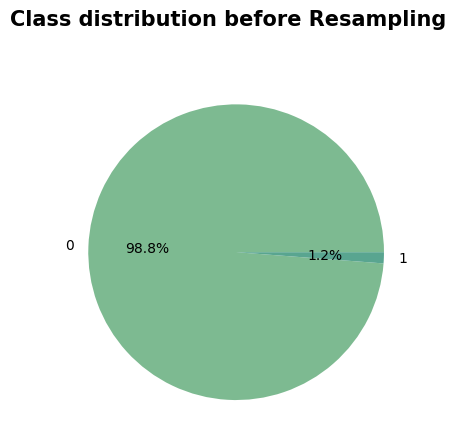

In [ ]:
fig,ax=plt.subplots(1,1)
plt.pie(x=label.value_counts(),labels=["0","1"],colors=sns.color_palette("crest"),autopct="%.1f%%")
fig.suptitle("Class distribution before Resampling",y=1,fontweight="bold",fontsize=15)
plt.show()

In [ ]:
# Using random undersampling technique
under = RandomUnderSampler(sampling_strategy=0.03)
X_under, y_under = under.fit_resample(final_features, label)

In [ ]:
# Using SMOTE
sm = SMOTE(random_state=6)
features_resample, labels_resample = sm.fit_resample(X_under, y_under)

In [ ]:
print("Data after Resampling........")
print("counts of label '1' after resampling: {}".format(sum(labels_resample == 1)))
print("counts of label '0' after resampling: {} \n".format(sum(labels_resample == 0)))

Data after Resampling........
counts of label '1' after resampling: 240000
counts of label '0' after resampling: 240000 



In [ ]:
labels_df = pd.Series(labels_resample)

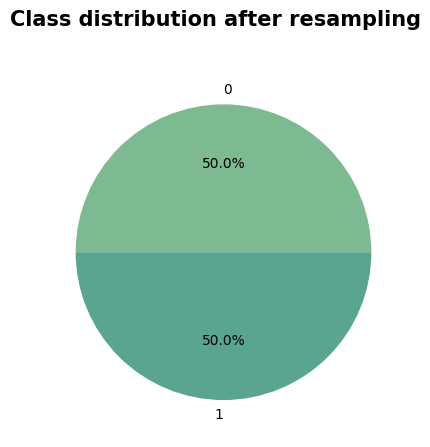

In [ ]:
fig,ax=plt.subplots(1,1)
plt.pie(x=labels_df.value_counts(),labels=["0","1"],colors=sns.color_palette('crest'),autopct="%.1f%%")
fig.suptitle("Class distribution after resampling",y=1,fontweight="bold",fontsize=15)
plt.show()

### 3.7 Utility functions to plot confusion matrix and ROC

#### To plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### To plot the ROC curve

In [ ]:
def plot_roc(predictions_prob, y_test_enh, ns_probs, model):
  lr_probs = predictions_prob[:, 1]
  ns_auc = roc_auc_score(y_test_enh, ns_probs)
  lr_auc = roc_auc_score(y_test_enh, lr_probs)
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print(model+': ROC AUC=%.3f' % (lr_auc))
  ns_fpr, ns_tpr, _ = roc_curve(y_test_enh, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test_enh, lr_probs)
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model)
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()

### 3.8 Collecting sample instances for final testing of models

In [ ]:
label_list = list(label)
test_data = df.iloc[[label_list.index(1)]] ## ground truth: fraud
test_data = test_data.append(df.iloc[[label_list.index(0)]]) ## ground truth: no fraud
test_data.head()

,customer,merchant,category,amount,fraud,custPageRank,merchPageRank,merchDegree,custDegree,merchCommunity,custCommunity
88,'C583110837','M480139044','es_health',44.26,1,0.15,41.821327,3972,15,608504,608498
0,'C1093826151','M348934600','es_transportation',4.55,0,0.15,139.320182,11787,7,608498,608498


In [ ]:
# Extracting features for test data

test_fraud = final_features.iloc[[label_list.index(1)]]
test_no_fraud = final_features.iloc[[label_list.index(0)]]
test_data = test_fraud.append(test_no_fraud)
test_data.head()

,amount,custPageRank,merchPageRank,merchDegree,custDegree,category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',...,merchCommunity_608544,merchCommunity_608545,merchCommunity_608546,merchCommunity_608547,custCommunity_608498,custCommunity_608499,custCommunity_608500,custCommunity_608501,custCommunity_608504,custCommunity_608505
88,0.057179,-1.665335e-16,-3.261962,-3.210032,1.196206,-0.104084,-0.038607,-0.10475,-0.214919,5.988222,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347
0,-0.299276,-1.665335e-16,0.686685,0.627143,-1.451389,-0.104084,-0.038607,-0.10475,-0.214919,-0.166994,...,-0.017449,-0.019238,-0.010773,-0.002246,0.123083,-0.104175,-0.059075,-0.019369,-0.017497,-0.005347


# 4. Spliting data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_resample, labels_resample, test_size = 0.3)

In [ ]:
# no score probabilities for ROC curve
ns_probs = [0 for _ in range(len(y_test))]


# 5. Training the Models

### We have used three standard classification model: Random Forest, KNN and XGBoost for training on the extracted features.

### For evaluation we use training time, classification report, confusion matrix and ROC on the test data.

## 5.1 Random Forest

In [ ]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     72175
           1       0.99      0.99      0.99     71825

    accuracy                           0.99    144000
   macro avg       0.99      0.99      0.99    144000
weighted avg       0.99      0.99      0.99    144000

CPU times: user 45.5 s, sys: 41.5 ms, total: 45.5 s
Wall time: 46.7 s


#### Confusion matrix & ROC curve for test data using random forest

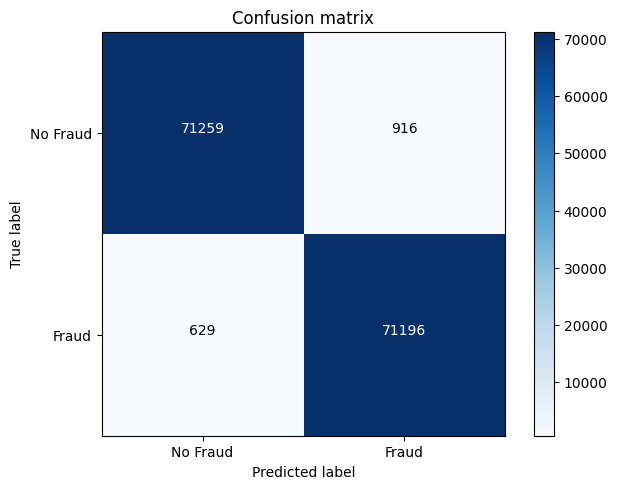

In [ ]:
cnf_matrix_tra = confusion_matrix(y_test, predictions)
class_names = ['No Fraud', 'Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.998


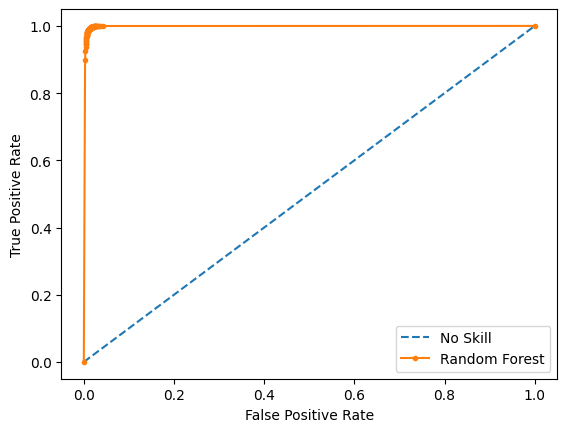

In [ ]:
predictions_prob = rf.predict_proba(X_test)
plot_roc(predictions_prob, y_test, ns_probs, 'Random Forest')
pyplot.show()

## 5.2 KNN

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predictions = knn.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     72175
           1       0.99      0.99      0.99     71825

    accuracy                           0.99    144000
   macro avg       0.99      0.99      0.99    144000
weighted avg       0.99      0.99      0.99    144000

CPU times: user 14min 20s, sys: 1.5 s, total: 14min 21s
Wall time: 8min 38s


### Confusion matrix & ROC curve for test data using KNN

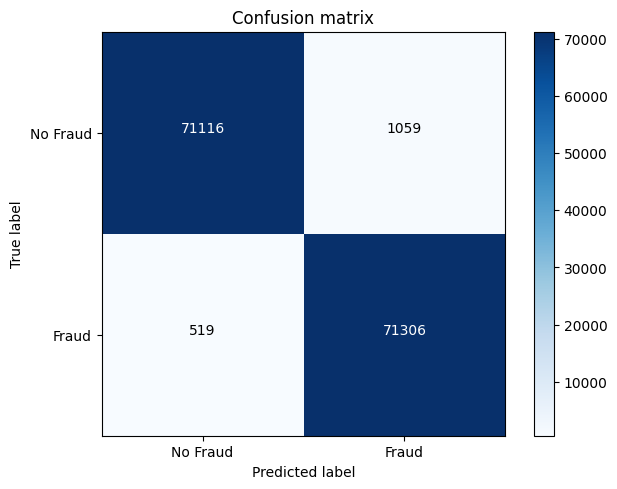

In [ ]:
cnf_matrix_tra = confusion_matrix(y_test, predictions)
class_names = ['No Fraud', 'Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
predictions_prob = knn.predict_proba(X_test)
plot_roc(predictions_prob, y_test, ns_probs, 'KNN')
pyplot.show()

## 5.3 XGBoost

In [ ]:
%%time
xgb = XGBClassifier()
xgb.fit(X_train, y_train.ravel())
predictions = xgb.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

### Confusion matrix & ROC curve for test data using XGBoost

In [ ]:
cnf_matrix_tra = confusion_matrix(y_test, predictions)
class_names = ['No Fraud', 'Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
predictions_prob = xgb.predict_proba(X_test)
plot_roc(predictions_prob, y_test, ns_probs, 'XGBoost')
pyplot.show()

# 6. Testing the models on sample data
### Testing the model with one fraud and one non fraud instance

In [ ]:
## testing using different models. 0-->no fraud  1-->fraud

predicted_results = {}
predicted_results['random forest'] = rf.predict(test_data)
predicted_results['KNN'] = knn.predict(test_data)
predicted_results['XGBoost'] = xgb.predict(test_data)

print(predicted_results)

# 7. Applying autologging Module

In [ ]:
summary, model= AutoLogger.train_and_log_classification(X_train,y_train, X_test,y_test,size='large')
pd.DataFrame(summary)

In [ ]:
print(model)

In [ ]:
AutoLogger.get_metric_plot_classification(summary,'validation','accuracy')